In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
import sqlite3
from matplotlib.patches import Circle
import itertools
from sklearn.inspection import permutation_importance
from matplotlib.patches import FancyBboxPatch
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from graphviz import Digraph
from IPython.display import Image
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import warnings
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.impute import SimpleImputer
import graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%ls
%pwd

drive/  sample_data/


'/content'

In [ ]:
found_file = False
# Propp's
try:
  with open('/content/drive/MyDrive/Fall2023/MachineLearning/database.sqlite', 'r') as f:
    print("found file")
    found_file = True
except FileNotFoundError:
  pass
# Eli
if(not found_file):
  try:
    with open('/content/drive/MyDrive/Fall2023/MachineLearning/database.sqlite', 'r') as f:
      print("found file")
      found_file = True
  except FileNotFoundError:
    pass
# Sabina
if(not found_file):
  try:
    with open('/content/drive/MyDrive/soccer database/database.sqlite', 'r') as f:
      print("found file")
      found_file = True
  except FileNotFoundError:
    pass

if(not found_file):
  print("Failed to find file in google drive")

found file


In [ ]:
from sqlite3.dbapi2 import OperationalError
open_file = False
if (not open_file):
  try:
    con = sqlite3.connect('/content/drive/MyDrive/Fall2023/MachineLearning/database.sqlite')
    open_file = True
  except OperationalError:
    pass
if (not open_file):
  try:
    con = sqlite3.connect('/content/drive/MyDrive/soccer database/database.sqlite')
    open_file = True
  except OperationalError:
    pass




matches = pd.read_sql_query("SELECT * FROM Match",con)

players = pd.read_sql("SELECT * FROM Player;", con)

teams = pd.read_sql("SELECT * FROM Team_Attributes;", con)

In [ ]:
binary_class_label = "home_team_win"
binary_class_label_complement = "away_team_win"
matches[binary_class_label] = np.where(matches["home_team_goal"] - matches["away_team_goal"] > 0, 1, 0)
matches[binary_class_label_complement] = np.where(matches["home_team_win"] == 0, 1, 0)

In [ ]:
num_home_wins = np.count_nonzero(matches["home_team_win"] == 1)
print(f"Percentage of home wins: {round(num_home_wins / matches.shape[0] * 100, 2)}%")

Percentage of home wins: 45.87%


In [ ]:
matches

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_team_win,away_team_win
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20,0,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60,0,1
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75,0,1
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50,1,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1


In [ ]:
odds_features = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'SJH', 'SJD', 'SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA']
odds_data = matches[odds_features + [binary_class_label]].dropna()

odds_data

,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,...,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA,home_team_win
997,2.38,3.25,3.00,2.45,3.30,2.70,2.30,3.1,2.60,2.38,...,2.40,3.40,2.90,2.45,3.30,2.70,2.40,3.25,2.70,0
998,1.80,3.60,4.33,1.75,3.70,4.20,1.80,3.2,3.70,1.73,...,1.80,3.60,4.50,1.75,3.70,4.20,1.80,3.50,4.00,1
999,1.65,3.80,5.00,1.67,3.60,5.00,1.65,3.3,4.40,1.67,...,1.70,3.70,5.00,1.67,3.60,5.00,1.70,3.50,4.50,0
1000,1.50,4.00,7.00,1.53,3.90,6.00,1.50,3.7,5.00,1.50,...,1.57,3.90,6.00,1.53,3.90,6.00,1.50,3.80,6.00,1
1001,1.29,5.25,10.00,1.25,5.50,10.00,1.25,4.5,9.00,1.25,...,1.25,5.50,12.00,1.25,5.50,10.00,1.25,5.50,9.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23412,2.00,3.40,3.75,2.00,3.20,3.90,1.85,3.5,3.95,1.90,...,2.05,3.50,3.90,2.00,3.20,3.90,2.00,3.40,3.50,1
23413,3.00,3.25,2.38,3.30,3.20,2.35,2.90,3.3,2.30,2.88,...,3.20,3.40,2.38,3.30,3.20,2.35,2.88,3.30,2.38,1
23414,8.00,4.50,1.40,8.75,4.75,1.40,7.60,4.8,1.35,8.00,...,9.00,5.25,1.36,8.75,4.75,1.40,8.50,4.50,1.36,0
23415,1.91,3.50,4.00,1.90,3.40,4.00,2.00,3.3,3.60,1.95,...,1.95,3.60,4.20,1.90,3.40,4.00,1.91,3.50,3.75,0


In [ ]:
X = odds_data.drop('home_team_win', axis=1)
y = odds_data['home_team_win']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
nn = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, activation='relu', solver='adam', random_state=1)
nn.fit(X_train, y_train)
print("Training set score: %f" % nn.score(X_train, y_train))
print("Test set score: %f" % nn.score(X_test, y_test))

Training set score: 0.656080
Test set score: 0.661232


In [ ]:
y_pred_nn = nn.predict(X_test)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Accuracy:", accuracy_nn)

Accuracy: 0.6612318840579711


In [ ]:
def ann_viz(model, view=True, filename="network.gv", title="My Neural Network", max_nodes_per_layer=10, edge_thickness=1.0):

    if not hasattr(model, 'coefs_'):
        raise ValueError("Model does not appear to be fitted yet. Please train it before trying to visualize.")

    dot = Digraph(comment=title)

    dot.attr('node', shape='circle', style='filled', fillcolor='#E0E0E0')
    dot.attr(rankdir='LR')
    dot.attr('edge', style='solid', color='gray', penwidth=str(edge_thickness))

    input_layer = min(model.coefs_[0].shape[0], max_nodes_per_layer)
    for i in range(input_layer):
        dot.node('I{}'.format(i), 'Input\n{}'.format(i + 1))

    last_layer = 'I'
    for i, (layer_weights, layer_intercepts) in enumerate(zip(model.coefs_, model.intercepts_)):
        layer_type = 'H' if i < len(model.coefs_) - 1 else 'O'
        layer_size = min(layer_weights.shape[1], max_nodes_per_layer)
        for j in range(layer_size):
            node_label = '{}{}'.format(layer_type, j)
            dot.node(node_label, '{}\n{}'.format('Hidden' if layer_type == 'H' else 'Output', j + 1))
            prev_layer_size = min(model.coefs_[i - 1].shape[0] if i > 0 else model.coefs_[0].shape[0], max_nodes_per_layer)
            for k in range(prev_layer_size):
                prev_node_label = '{}{}'.format(last_layer, k)
                dot.edge(prev_node_label, node_label)
        last_layer = layer_type

    dot.render(filename, view=view)
    return dot



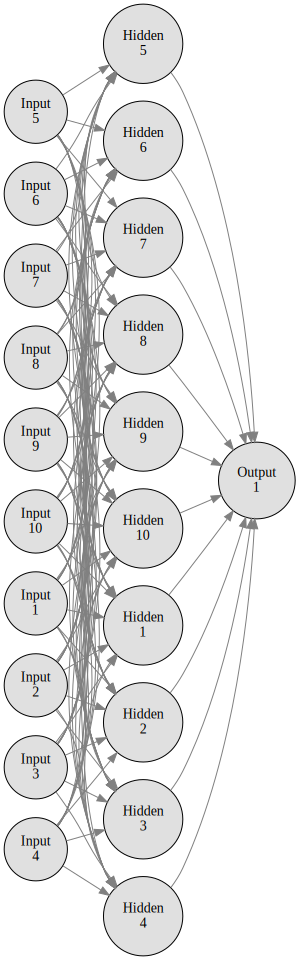

In [ ]:
ann_viz(nn)

In [ ]:
#Optimization
parameter_space = {
    'hidden_layer_sizes': [(randint.rvs(10, 100), randint.rvs(10, 100)), (randint.rvs(10, 100),)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': (0.0001, 0.05),
    'learning_rate': ['constant', 'adaptive'],
}

clf = GridSearchCV(nn, parameter_space, n_jobs=-1, cv=5)

clf.fit(X_train, y_train)
print('Best parameters found:\n', clf.best_params_)

In [ ]:
y_true, y_pred = y_test , clf.predict(X_test)

print('Results on the test set:')
print(classification_report(y_true, y_pred))

In [ ]:
perm_importance = permutation_importance(nn, X_test, y_test, n_repeats=30, random_state=0)


feature_importances = pd.Series(perm_importance.importances_mean, index=X_train.columns)


feature_importances_sorted = feature_importances.sort_values()

feature_importances_sorted.plot.barh(color='green')
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (MLPClassifier)")
plt.show()

In [ ]:
most_important = ["SJA", "GBA", "PSA"]
better_odds_data = matches[most_important + [binary_class_label]].dropna()
new_nn = nn
X_train, X_test, y_train, y_test = train_test_split(better_odds_data[most_important], better_odds_data["home_team_win"], test_size=0.2)
for i in range(10):
  new_nn.fit(X_train, y_train)
  score = new_nn.score(X_test, y_test)
  print(score)
print(new_nn.score(X_test, y_test))
print(new_nn.score(X_test, y_test))
y_pred = new_nn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Training set score: %f" % new_nn.score(X_train, y_train))
print("Test set score: %f" % nn.score(X_test, y_test))
print("Accuracy:", accuracy)

In [ ]:
team_attributes = pd.read_sql("SELECT * FROM Team_Attributes;", con)

In [ ]:
buildup_features = ["buildUpPlaySpeed", "buildUpPlayDribbling", "buildUpPlayPassing"]
chance_creation_features = ["chanceCreationPassing", "chanceCreationCrossing", "chanceCreationShooting"]
defence_features = ["defencePressure", "defenceAggression", "defenceTeamWidth"]
categories = [buildup_features, chance_creation_features, defence_features]

aggregations = ["mean", "min", "max", "median"]

all_attr_features = []
for category in categories:
    all_attr_features += category

all_attr_features_agg = []
categories_agg = []
for category in categories:
    category_agg = []
    for agg in aggregations:
        for feature in category:
            formatted_feature_name = f"{feature}_{agg}"
            category_agg.append(formatted_feature_name)
            all_attr_features_agg.append(formatted_feature_name)
    categories_agg.append(category_agg)

len(all_attr_features_agg)

In [ ]:
aggregated_attributes = team_attributes.groupby("team_api_id").agg(
    {feature : [(f"{feature}_{agg}", agg) for agg in aggregations]for feature in all_attr_features}
).reset_index(col_level = 1).droplevel(level = 0, axis = 1)[["team_api_id"] + all_attr_features_agg]

aggregated_attributes.head()

In [ ]:
def attribute_matchup(dataset, home_id, away_id):
    """
    Computes the matchup features for the home_id and away_id.
    """
    home = dataset[dataset["team_api_id"] == home_id][all_attr_features_agg].to_numpy()
    away = dataset[dataset["team_api_id"] == away_id][all_attr_features_agg].to_numpy()
    if len(home) == 0 or len(away) == 0:
        # Team not present, no matchup possible
        return pd.Series([np.nan] * len(all_attr_features_agg), index = all_attr_features_agg)
    diff = (home - away)[0]
    return pd.Series(diff, index = all_attr_features_agg)

In [ ]:
attr_data = matches.copy()
attr_data[all_attr_features_agg] = attr_data.apply(lambda x: attribute_matchup(aggregated_attributes, x["home_team_api_id"], x["away_team_api_id"]), axis = 1, result_type = "expand")

In [ ]:
attr_data = attr_data.dropna()

In [ ]:
attr_data[all_attr_features_agg]

In [ ]:
attr_data[binary_class_label]

In [ ]:
attr_nn = MLPClassifier()
X_train, X_test, y_train, y_test = train_test_split(attr_data[all_attr_features_agg], attr_data[binary_class_label], test_size=0.2)
#Optimization
parameter_space = {
    'hidden_layer_sizes': [(randint.rvs(10, 100), randint.rvs(10, 100)), (randint.rvs(10, 100),)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': (0.0001, 0.05),
    'learning_rate': ['constant', 'adaptive'],
}

clf = GridSearchCV(attr_nn, parameter_space, n_jobs=-1, cv=5)

clf.fit(X_train, y_train)
print('Best parameters found:\n', clf.best_params_)

In [ ]:
y_true, y_pred = y_test , clf.predict(X_test)

print('Results on the test set:')
print(classification_report(y_true, y_pred))

In [ ]:
attr_nn = MLPClassifier(hidden_layer_sizes=[40,40,40,40,40], activation="tanh", solver="adam", max_iter= 1000, early_stopping=True)
attr_nn.fit(X_train, y_train)
trainscore = attr_nn.score(X_train, y_train)
testscore = attr_nn.score(X_test, y_test)

y_pred = attr_nn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Trainscore: %f" % trainscore)
print("TestScore: %f" % testscore)

In [ ]:
perm_importance = permutation_importance(attr_nn, X_test, y_test, n_repeats=30, random_state=0)


feature_importances = pd.Series(perm_importance.importances_mean, index=X_train.columns)


feature_importances_sorted = feature_importances.sort_values()

feature_importances_sorted.plot.barh(color='green')
plt.xlabel("Permutation Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (MLPClassifier)")
plt.show()

In [ ]:
feature_importances_sorted[16:36]

In [ ]:
key_features = ["buildUpPlayDribbling_median", "buildUpPlayPassing_max", "buildUpPlayPassing_median", "chanceCreationPassing_mean", "buildUpPlaySpeed_median", "buildUpPlayPassing_min", "chanceCreationCrossing_median", "chanceCreationPassing_median", "chanceCreationPassing_max", "chanceCreationPassing_min", "buildUpPlayDribbling_mean", "chanceCreationShooting_max", "buildUpPlayDribbling_min", "defencePressure_min", "chanceCreationCrossing_max", "chanceCreationShooting_median", "defenceTeamWidth_median", "buildUpPlaySpeed_min", "buildUpPlayDribbling_max", "chanceCreationCrossing_mean"]
X_train, X_test, y_train, y_test = train_test_split(attr_data[key_features], attr_data[binary_class_label], test_size=0.2)
attr_nn = MLPClassifier(hidden_layer_sizes=[40,40,40,40,40], activation="tanh", solver="adam", max_iter= 1000, early_stopping=True)
attr_nn.fit(X_train, y_train)
trainscore = attr_nn.score(X_train, y_train)
testscore = attr_nn.score(X_test, y_test)

y_pred = attr_nn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Trainscore: %f" % trainscore)
print("TestScore: %f" % testscore)

Using Player Attributes for the Neural Network:

In [ ]:
#Player attributes
# Define column names for home and away players
home_cols = [f'home_player_{i}' for i in range(1, 12)]
away_cols = [f'away_player_{i}' for i in range(1, 12)]

# Reformat Match to create teams
home_team = pd.melt(matches, id_vars=['match_api_id', 'home_team_api_id', 'home_team_win'], value_vars=home_cols,
                   var_name='home_player_number', value_name='player_api_id')
away_team = pd.melt(matches, id_vars=['match_api_id', 'away_team_api_id'], value_vars=away_cols,
                   var_name='away_player_number', value_name='player_api_id')



In [ ]:
def average_data (df, feature):
    # Merge the player data with the team data
    merged_home = home_team.merge(df, on='player_api_id')
    merged_away = away_team.merge(df, on='player_api_id')

    # Average weight
    average_home = merged_home.groupby('match_api_id')[feature].mean().reset_index()
    average_away = merged_away.groupby('match_api_id')[feature].mean().reset_index()

    # Merged home and away
    average = average_home.merge(average_away, on='match_api_id')
    average = average.merge(matches[['match_api_id', 'home_team_win']], on='match_api_id')

    # Rename columns
    average.rename(columns={'{feature}_x'.format(feature = feature): 'home_{feature}'.format(feature = feature), '{feature}_y'.format(feature = feature): 'away_{feature}'.format(feature = feature)}, inplace=True)

    # Difference column
    average['{feature}_difference'.format(feature=feature)]  = average['home_{feature}'.format(feature = feature)] - average['away_{feature}'.format(feature = feature)]

    return average

In [ ]:
def neural_network (data_x, data_y):
    x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.1, random_state=16)
    curr_nn = MLPClassifier()
    curr_nn.fit(x_train, y_train)
    predictions = curr_nn.predict(x_test)
    score = curr_nn.score(x_test, y_test)
    print(score)

**Weight**

In [ ]:
avg_weight = average_data(players, 'weight')
avg_weight

In [ ]:
neural_network(avg_weight[['home_weight']], avg_weight.home_team_win)

In [ ]:
neural_network(avg_weight[['weight_difference']], avg_weight.home_team_win)

**Height**

In [ ]:
avg_height = average_data(players, 'height')
avg_height

In [ ]:
neural_network(avg_height[['home_height']], avg_height.home_team_win)

In [ ]:
neural_network(avg_height[['height_difference']], avg_height.home_team_win)

**Overall Rating**

In [ ]:
#player = pd.read_sql("SELECT * FROM player", con).dropna()
player_attributes = pd.read_sql("SELECT * FROM Player_Attributes", con).dropna()
player_attributes

In [ ]:
avg_rating = average_data(player_attributes, 'overall_rating')
avg_rating

In [ ]:
neural_network(avg_rating[['home_overall_rating']], avg_rating.home_team_win)

In [ ]:
neural_network(avg_rating[['overall_rating_difference']], avg_rating.home_team_win)

**Potential**

In [ ]:
avg_potential = average_data(player_attributes, 'potential')
avg_potential

In [ ]:
neural_network(avg_potential[['home_potential']], avg_potential.home_team_win)

In [ ]:
neural_network(avg_potential[['potential_difference']], avg_potential.home_team_win)

In [ ]:
def neural_network_optimized (data_x, data_y):
    x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=16)
    curr_nn = MLPClassifier([40,50,40], "relu", early_stopping=True, validation_fraction=0.2, n_iter_no_change=30)
    curr_nn.fit(x_train, y_train)
    predictions = curr_nn.predict(x_test)
    print(curr_nn.score(x_train, y_train))
    score = curr_nn.score(x_test, y_test)
    print(score)

In [ ]:
neural_network_optimized(avg_rating[['overall_rating_difference']], avg_rating.home_team_win)

In [ ]:
neural_network_optimized(avg_potential[['potential_difference']], avg_potential.home_team_win)